# Adam Simpson - Mini Project 2 // Telco Customer Churn


#### 1-2-3 Data Time!!!

In [195]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

sns.set(style='whitegrid')

In [124]:
# 2. Load the dataset for EDA prep

# data reference:  https://www.kaggle.com/datasets/blastchar/telco-customer-churn

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
# Trust, but verify. LOL

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


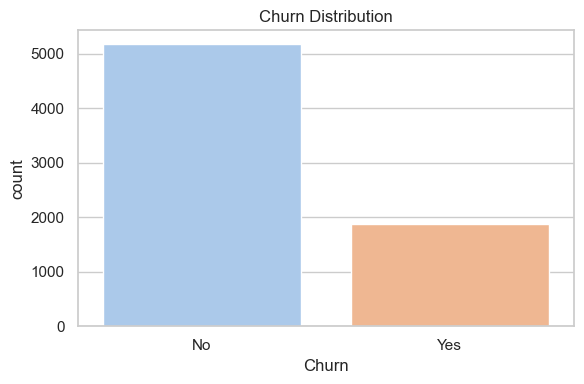

In [126]:
# 3. Exploratory Data Analysis: Churn Distribution

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='pastel', hue='Churn', legend=False)
plt.title('Churn Distribution')
plt.tight_layout()
plt.show()

#### The churn distribution shows an imbalanced dataset. Most of the customers did not churn. A smaller portion did churn.

#### Analyzing the churn by Contract Type, Monthly Charges, and Tenure will help identify what factors are strongly associated with customer loss.

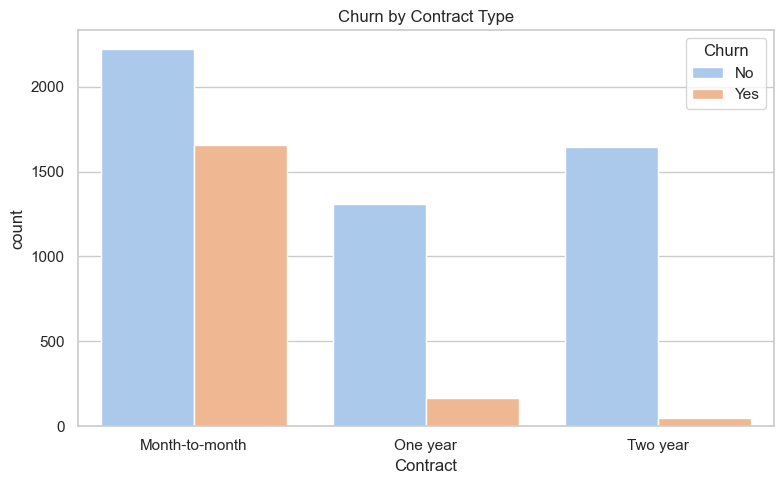

In [133]:
# EDA: Churn by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn by Contract Type')
plt.tight_layout()
plt.show()

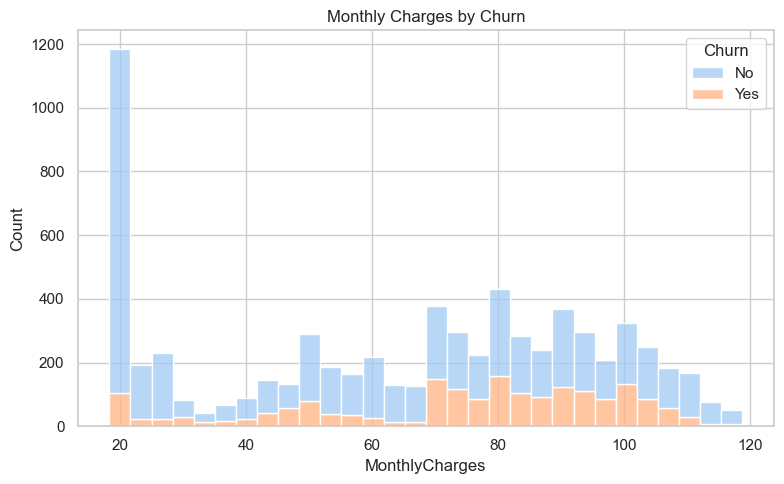

In [137]:
# EDA: Monthly Charges vs Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', palette='pastel', bins=30)
plt.title('Monthly Charges by Churn')
plt.tight_layout()
plt.show()

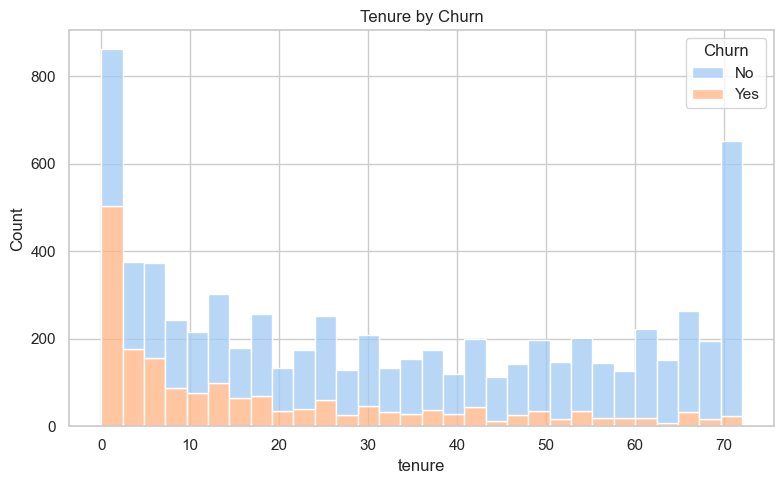

In [141]:
# EDA: Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='pastel', bins=30)
plt.title('Tenure by Churn')
plt.tight_layout()
plt.show()

#### Top feature evaluation

In [201]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [203]:
# X. Feature Importance
importances = model.feature_importances_
features = X.columns
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

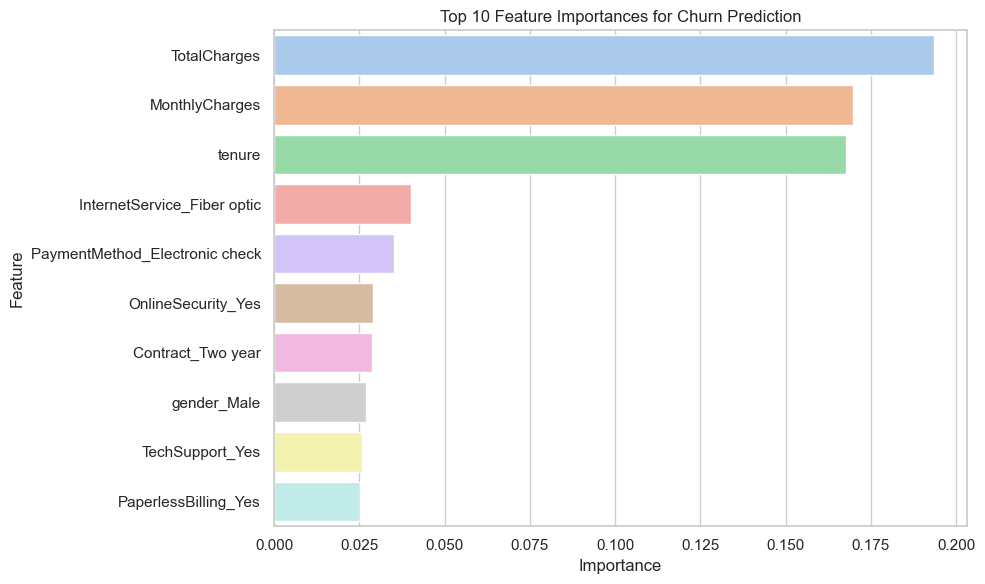

In [205]:
# X. Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='pastel', hue= 'Feature', legend=False)
plt.title('Top 10 Feature Importances for Churn Prediction')
plt.tight_layout()
plt.show()

#### Insights and Obervations:

In [ ]:
# 4. Insights:

# Contract Type:
# Month To Month customers are far more likely to churn
# One year and two year contracts are associated with lower churn, most likely due to commitment or loyalty incentives

# Monthly Charges:
# Customers with higher monthly charges churn more frequently.
# Suggests pricing could be a pain point, especially if value isn’t clear.

# Tenure:
# Most churn happens early — customers in their first year are most at risk.
# Longer-tenure customers are much more likely to stay.

#### Additional data clean up targeting churn and modeling.

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [165]:
# 5. Clean the data set // Total Charges conversion to numeric - focus and drop Customer ID.
# We learned about dropping columns and using inplace=True recently.

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Drop customerID
df.drop(columns='customerID', inplace=True)

In [167]:
# 6. Convert target variable // The focus of the project is "Churn" as the target variable

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Category Conversion
df = pd.get_dummies(df, drop_first=True)

df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [169]:
# 7. Test Train Splits w/ fit and transform

X = df.drop('Churn', axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
# 8. Train Models

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# SVM 
svm_model = svm.SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC Score: 0.8319

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

AUC Score: 0.8194

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.54      0.58       374

    accuracy                     

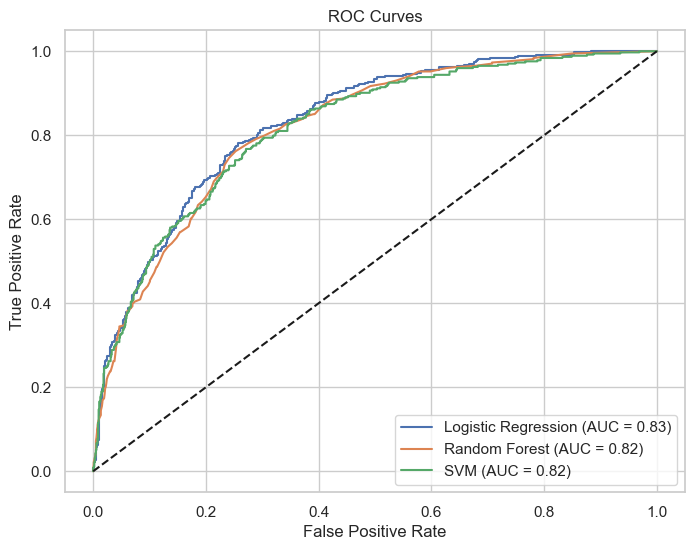

In [173]:
# 9. Evaluate the Models

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    proba = svm_model.predict(X_test)
    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.figure(figsize=(8,6))
evaluate_model(log_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")
evaluate_model(svm_model, "SVM")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

Best parameters for Random Forest:
{'max_depth': 10, 'n_estimators': 100}

Tuned Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407

AUC Score: 0.8285


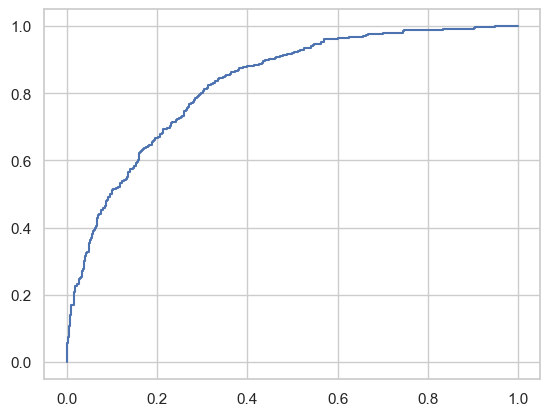

In [175]:
# 10. Hyperparameter Tuning - Random Forest // Decision Trees and Classification Problems

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:")
print(grid_rf.best_params_)

# Evaluate best model
best_rf = grid_rf.best_estimator_
evaluate_model(best_rf, "Tuned Random Forest")

In [176]:
# 11. Final Model Comparison Table (F1-scores for simplicity) // mean of precision and recall.

from sklearn.metrics import f1_score

models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "Tuned Random Forest": best_rf
}

f1_scores = {name: f1_score(y_test, model.predict(X_test)) for name, model in models.items()}
pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1 Score']).sort_values(by='F1 Score', ascending=False)

,F1 Score
SVM,0.582609
Logistic Regression,0.563504
Tuned Random Forest,0.561832
Random Forest,0.524691
